## Avocado Project

Project Description
This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 
Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 
The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:
•Date - The date of the observation
•AveragePrice - the average price of a single avocado
•type - conventional or organic
•year - the year
•Region - the city or region of the observation
•Total Volume - Total number of avocados sold
•4046 - Total number of avocados with PLU 4046 sold
•4225 - Total number of avocados with PLU 4225 sold
•4770 - Total number of avocados with PLU 4770 sold

Inspiration/Label 
The dataset can be seen in two angles to find the region and find the average price .
Task: One of Classification and other of Regression
Do both tasks in the same .ipynb file and submit at single file. 

Dataset Link

https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/blob/master/avocado.csv.zip


## Avocado Project - Classification to find the region 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score, roc_auc_score, auc

from sklearn.model_selection import cross_val_score

## Data Collection

In [2]:
avocado_df = pd.read_csv("avocado.csv")
avocado_df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


Observation:
            1. Label (i.e. "region") contains classification data so this is a Classification 
               Problem.
            2. Multi-Classification Problem

## Exploratory Data Analysis

In [3]:
avocado_df.shape

(18249, 14)

In [4]:
avocado_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [5]:
avocado_df.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [6]:
avocado_df.isna().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

Observation:
            1. No Null values

In [7]:
avocado_df.columns.tolist()

['Unnamed: 0',
 'Date',
 'AveragePrice',
 'Total Volume',
 '4046',
 '4225',
 '4770',
 'Total Bags',
 'Small Bags',
 'Large Bags',
 'XLarge Bags',
 'type',
 'year',
 'region']

## Drop Column not needed

In [8]:
# 'Unnamed: 0' column not needed for prediction to "find the region'

avocado_df.drop(["Unnamed: 0"], axis = 1, inplace = True)
avocado_df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [9]:
avocado_df.shape  # 13 columns

(18249, 13)

## check for any blank records

In [10]:
for i in avocado_df.columns:
    print(avocado_df.loc[avocado_df[i] == ' '])

Empty DataFrame
Columns: [Date, AveragePrice, Total Volume, 4046, 4225, 4770, Total Bags, Small Bags, Large Bags, XLarge Bags, type, year, region]
Index: []
Empty DataFrame
Columns: [Date, AveragePrice, Total Volume, 4046, 4225, 4770, Total Bags, Small Bags, Large Bags, XLarge Bags, type, year, region]
Index: []
Empty DataFrame
Columns: [Date, AveragePrice, Total Volume, 4046, 4225, 4770, Total Bags, Small Bags, Large Bags, XLarge Bags, type, year, region]
Index: []
Empty DataFrame
Columns: [Date, AveragePrice, Total Volume, 4046, 4225, 4770, Total Bags, Small Bags, Large Bags, XLarge Bags, type, year, region]
Index: []
Empty DataFrame
Columns: [Date, AveragePrice, Total Volume, 4046, 4225, 4770, Total Bags, Small Bags, Large Bags, XLarge Bags, type, year, region]
Index: []
Empty DataFrame
Columns: [Date, AveragePrice, Total Volume, 4046, 4225, 4770, Total Bags, Small Bags, Large Bags, XLarge Bags, type, year, region]
Index: []
Empty DataFrame
Columns: [Date, AveragePrice, Total Volume

Observation:
            1. checked all 13 columns but none have any blank values

## check the duplicate values in rows

In [14]:
avocado_df.shape

(18249, 13)

In [15]:
avocado_df.duplicated().sum()

0

In [16]:
avocado_df.shape

(18249, 13)

Observation:
            1. No duplicate values in any of the rows.

## Number of uniques values in each column 

In [17]:
avocado_df.nunique().to_frame("No. of Unique Values")

,No. of Unique Values
Date,169
AveragePrice,259
Total Volume,18237
4046,17702
4225,18103
4770,12071
Total Bags,18097
Small Bags,17321
Large Bags,15082
XLarge Bags,5588


In [18]:
avocado_df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


Observations:
            1. No missing values
            2. Mean value is > median value so it is right skew and postively correlated
            3. There are huge difference betwen 75% and max and hence looks like there are quite 
                more number of outliers

In [19]:
avocado_df.Date.min()

'2015-01-04'

In [20]:
avocado_df.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

## Date cannnot be object type - it should be datetime type, so convert

In [21]:
avocado_df['Date'] = pd.to_datetime(avocado_df.Date, format = "%Y-%m-%d")

In [22]:
avocado_df['Date'].dtype

dtype('<M8[ns]')

In [23]:
avocado_df.dtypes

Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
4046                   float64
4225                   float64
4770                   float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                    object
year                     int64
region                  object
dtype: object

In [24]:
avocado_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          18249 non-null  datetime64[ns]
 1   AveragePrice  18249 non-null  float64       
 2   Total Volume  18249 non-null  float64       
 3   4046          18249 non-null  float64       
 4   4225          18249 non-null  float64       
 5   4770          18249 non-null  float64       
 6   Total Bags    18249 non-null  float64       
 7   Small Bags    18249 non-null  float64       
 8   Large Bags    18249 non-null  float64       
 9   XLarge Bags   18249 non-null  float64       
 10  type          18249 non-null  object        
 11  year          18249 non-null  int64         
 12  region        18249 non-null  object        
dtypes: datetime64[ns](1), float64(9), int64(1), object(2)
memory usage: 1.8+ MB


In [25]:
avocado_df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [26]:
avocado_df.shape

(18249, 13)

In [27]:
avocado_df.nunique().to_frame("No of unique Values")

,No of unique Values
Date,169
AveragePrice,259
Total Volume,18237
4046,17702
4225,18103
4770,12071
Total Bags,18097
Small Bags,17321
Large Bags,15082
XLarge Bags,5588


In [28]:
# check the value counts of each column

for i in avocado_df.columns:
    print(avocado_df[i].value_counts())
    print('\n')

2015-12-27    108
2017-12-24    108
2017-12-10    108
2017-12-03    108
2017-11-26    108
             ... 
2016-11-06    108
2018-01-07    108
2017-06-18    107
2017-06-25    107
2015-12-06    107
Name: Date, Length: 169, dtype: int64


1.15    202
1.18    199
1.08    194
1.26    193
1.13    192
       ... 
3.25      1
3.12      1
2.68      1
3.03      1
3.17      1
Name: AveragePrice, Length: 259, dtype: int64


4103.97       2
3529.44       2
46602.16      2
13234.04      2
3713.49       2
             ..
874349.55     1
1621253.97    1
830499.38     1
845065.66     1
17489.58      1
Name: Total Volume, Length: 18237, dtype: int64


0.00       242
3.00        10
4.00         8
1.24         8
1.00         8
          ... 
1486.31      1
1761.80      1
1772.26      1
1803.39      1
2894.77      1
Name: 4046, Length: 17702, dtype: int64


0.00         61
177.87        3
215.36        3
1.30          3
1.26          3
             ..
417905.67     1
275986.91     1
277789.30     1
37815

## Data Visualization

In [29]:
# seperating numerical and categorical columns

cat_col = []
for i in avocado_df.dtypes.index:
    if avocado_df.dtypes[i] == 'object':
        cat_col.append(i)
print("Categorical Column", cat_col)
print("\n")


num_col = []
for i in avocado_df.dtypes.index:
    if avocado_df.dtypes[i] != 'object':
        num_col.append(i)
print("Numerical Column", num_col)

Categorical Column ['type', 'region']


Numerical Column ['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year']


conventional    9126
organic         9123
Name: type, dtype: int64


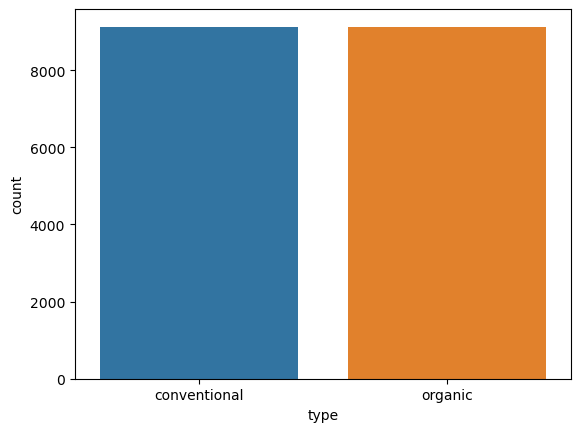

In [30]:
# Univariate Analysis

sns.countplot(x = 'type', data = avocado_df)
print(avocado_df.type.value_counts())

Observation:
            1. The conventional type of Avocado is 9126

2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64


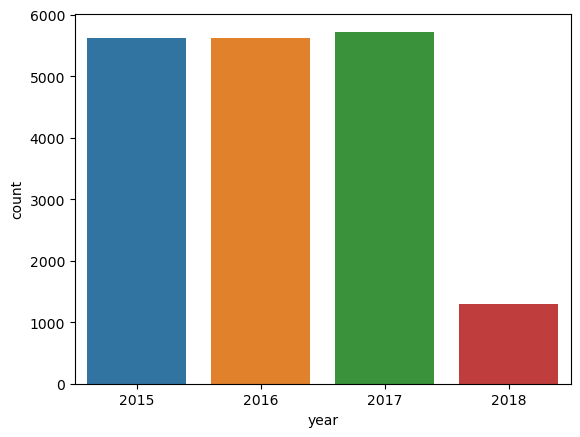

In [31]:
# Univariate Analysis

sns.countplot(x = 'year', data = avocado_df)
print(avocado_df.year.value_counts())

Observation:
            1. In the year 2017 is 5722

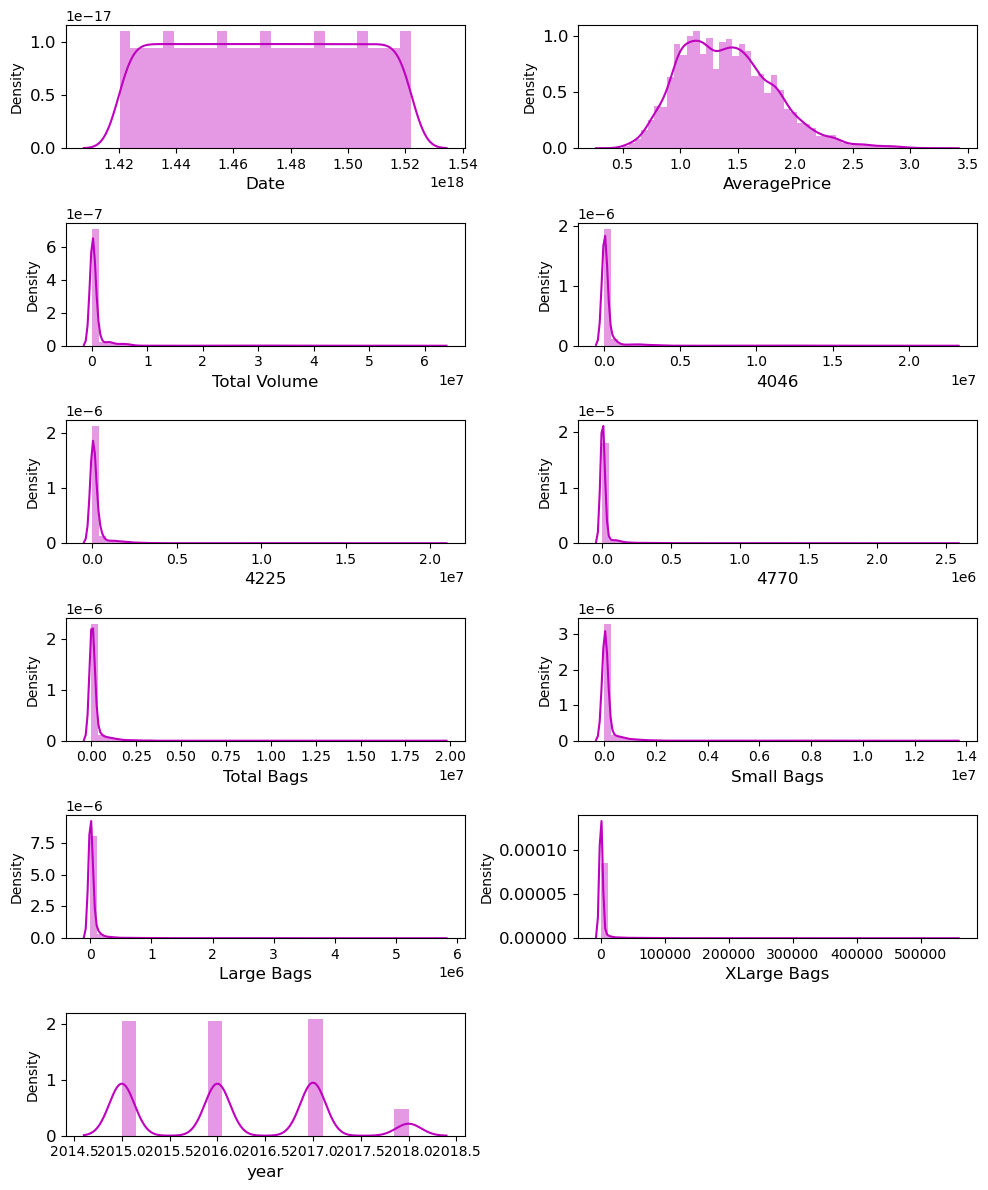

In [32]:
# lets see how data is distributed for each numerical column

plt.figure(figsize=(10,12))
p = 1
for i in num_col:
    if p <= 11:
        ax = plt.subplot(6, 2, p)
        sns.distplot(avocado_df[i], color = 'm')
        plt.xlabel(i, fontsize = 12)
        plt.yticks(rotation = 0, fontsize = 12)
    p = p + 1
plt.tight_layout()

Observation:
            1. The continuous data like 'AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total 
               Bags', 'Small Bags', 'Large Bags', 'XLarge Bags' are not well normally distributed. 
            2. There are outliers
            3. we need to deal with skewness in the data 

<AxesSubplot:xlabel='type', ylabel='AveragePrice'>

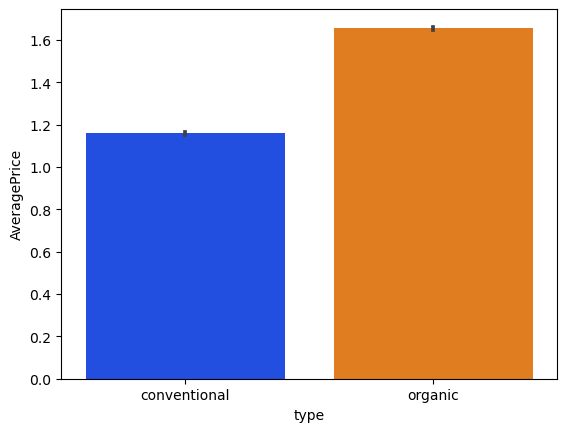

In [33]:
# plot type v/s AveragePrice

sns.barplot(x = 'type', y = 'AveragePrice', data = avocado_df, palette = 'bright')

Observation:
            1. The organic type of Avocado has more AveragePrice compared to conventional type.

<AxesSubplot:xlabel='year', ylabel='AveragePrice'>

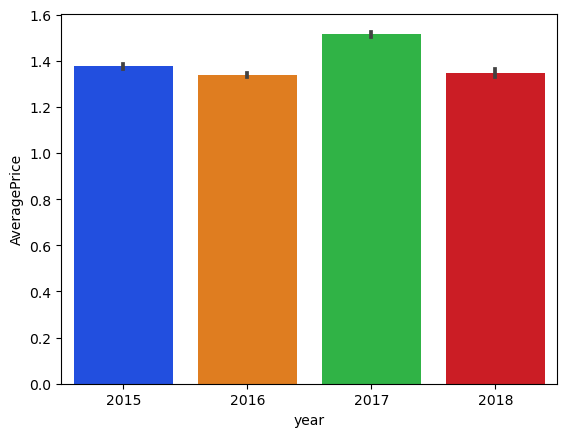

In [34]:
# plot year v/s AveragePrice

sns.barplot(x = 'year', y = 'AveragePrice', data = avocado_df, palette = 'bright')

Observation:
            1. In 2017 we have more AveragePrice compared to other years.

<AxesSubplot:xlabel='year', ylabel='Total Volume'>

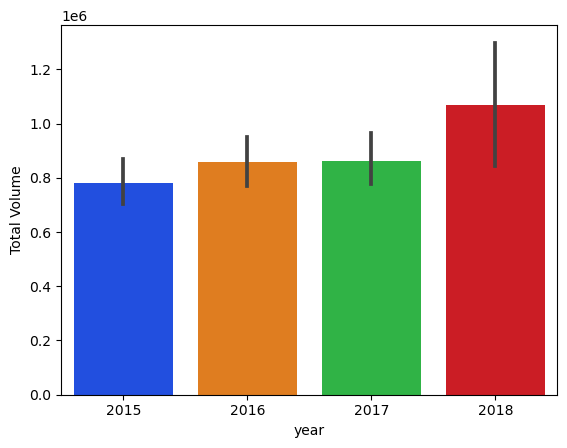

In [35]:
# plot year v/s Total Volume

sns.barplot(x = 'year', y = 'Total Volume', data = avocado_df, palette = 'bright')

Observation:
            1. In 2018 we have more more number of Avocado sold compared to other years.

In [36]:
avocado_df.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

In [37]:
avocado_df.shape

(18249, 13)

## Feature Encoding

In [38]:
# Convert Object data type to int type

avocado_df.dtypes

Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
4046                   float64
4225                   float64
4770                   float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                    object
year                     int64
region                  object
dtype: object

In [39]:
from sklearn.preprocessing import LabelEncoder

label_enc =  LabelEncoder()

In [40]:
for i in cat_col[:2]:
    avocado_df[i] = label_enc.fit_transform(avocado_df[i])

In [41]:
avocado_df.dtypes

Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
4046                   float64
4225                   float64
4770                   float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                     int32
year                     int64
region                   int32
dtype: object

<AxesSubplot:xlabel='year', ylabel='4046'>

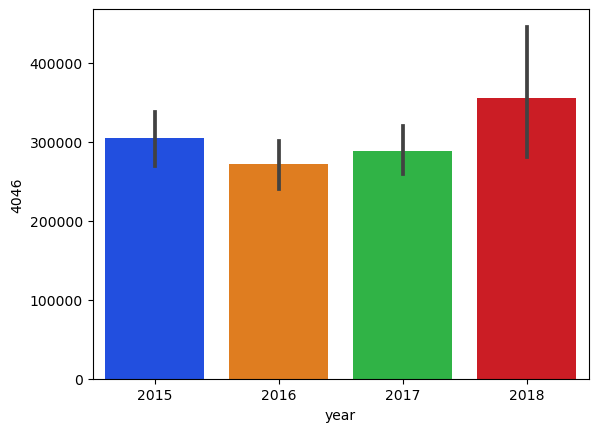

In [42]:
# plot year v/s 4046

sns.barplot(x = 'year', y = '4046', data = avocado_df, palette = 'bright')

Observation:
            1. In the year 2018 has more number of avocados with PLU 4046 sold

<AxesSubplot:xlabel='year', ylabel='4225'>

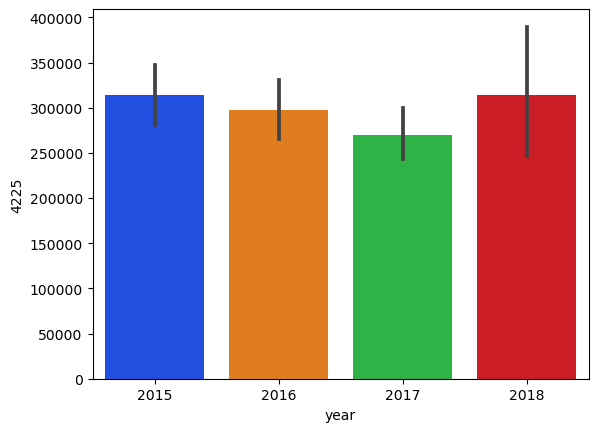

In [43]:
# plot year v/s 4225

sns.barplot(x = 'year', y = '4225', data = avocado_df, palette = 'bright')

Observation:
            1. In the year 2015 and 2018 has more number of avocados with PLU 4225 sold

<AxesSubplot:xlabel='year', ylabel='4770'>

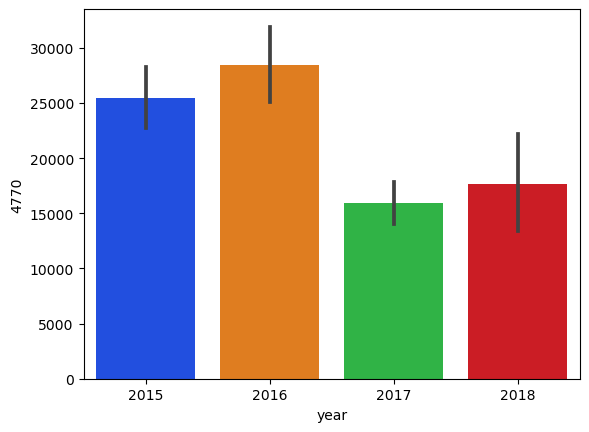

In [44]:
# plot year v/s 4770

sns.barplot(x = 'year', y = '4770', data = avocado_df, palette = 'bright')

Observation:
            1. In the year 2016 has more number of avocados with PLU 4770 sold

<AxesSubplot:xlabel='year', ylabel='Total Bags'>

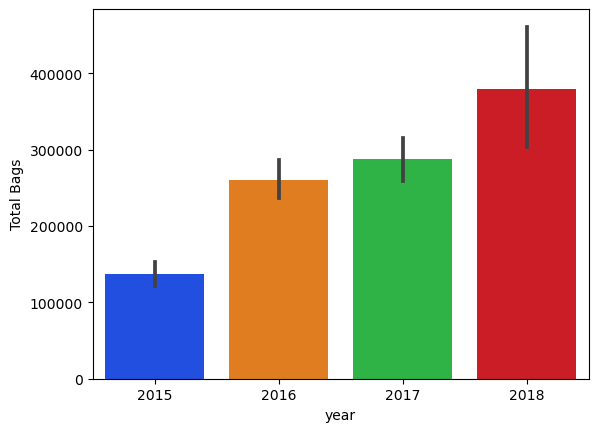

In [45]:
# plot year v/s Total Bags

sns.barplot(x = 'year', y = 'Total Bags', data = avocado_df, palette = 'bright')

<AxesSubplot:xlabel='type', ylabel='4046'>

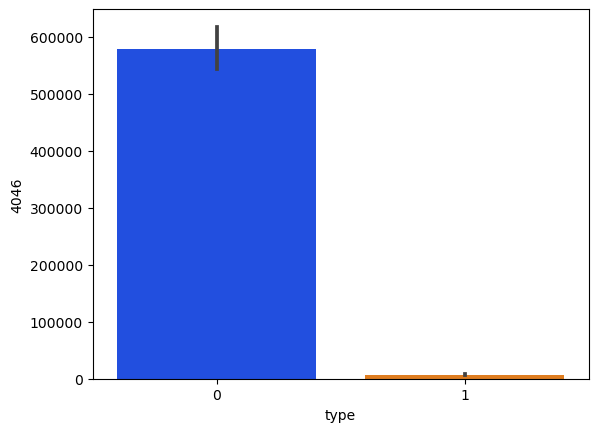

In [46]:
# plot type v/s 4046

sns.barplot(x = 'type', y = '4046', data = avocado_df, palette = 'bright')

Observation:
            1. The 'conventional' type has more number of avocados with PLU 4046 sold

0     338
40    338
29    338
30    338
31    338
32    338
33    338
34    338
35    338
36    338
37    338
38    338
39    338
41    338
1     338
42    338
43    338
44    338
45    338
46    338
47    338
48    338
49    338
50    338
51    338
52    338
28    338
27    338
26    338
25    338
2     338
3     338
4     338
5     338
6     338
7     338
8     338
9     338
10    338
11    338
12    338
13    338
14    338
15    338
16    338
17    338
18    338
19    338
20    338
21    338
22    338
23    338
24    338
53    335
Name: region, dtype: int64


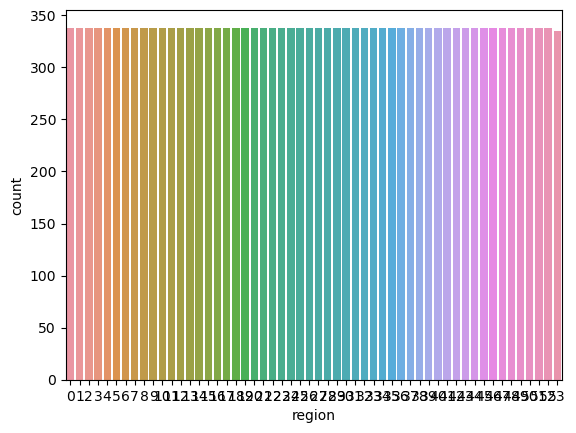

In [48]:
# Univariate Analysis

sns.countplot(x = 'region', data = avocado_df)
print(avocado_df.region.value_counts())

## Check for Multicollinearity

## Data Correlation find - whether we need all 12 columns

In [50]:
# get coefficient of one variable with all the other variables

cor = avocado_df.corr()
cor

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
AveragePrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.615845,0.093197,-0.011716
Total Volume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,-0.232434,0.017193,0.174176
4046,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,-0.225819,0.003353,0.192073
4225,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.232289,-0.009559,0.145726
4770,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.210027,-0.036531,0.095252
Total Bags,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,-0.217788,0.071552,0.175256
Small Bags,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,-0.220535,0.063915,0.164702
Large Bags,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,-0.193177,0.087891,0.198768
XLarge Bags,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,-0.175483,0.081033,0.082281
type,0.615845,-0.232434,-0.225819,-0.232289,-0.210027,-0.217788,-0.220535,-0.193177,-0.175483,1.000000,-0.000032,-0.000280


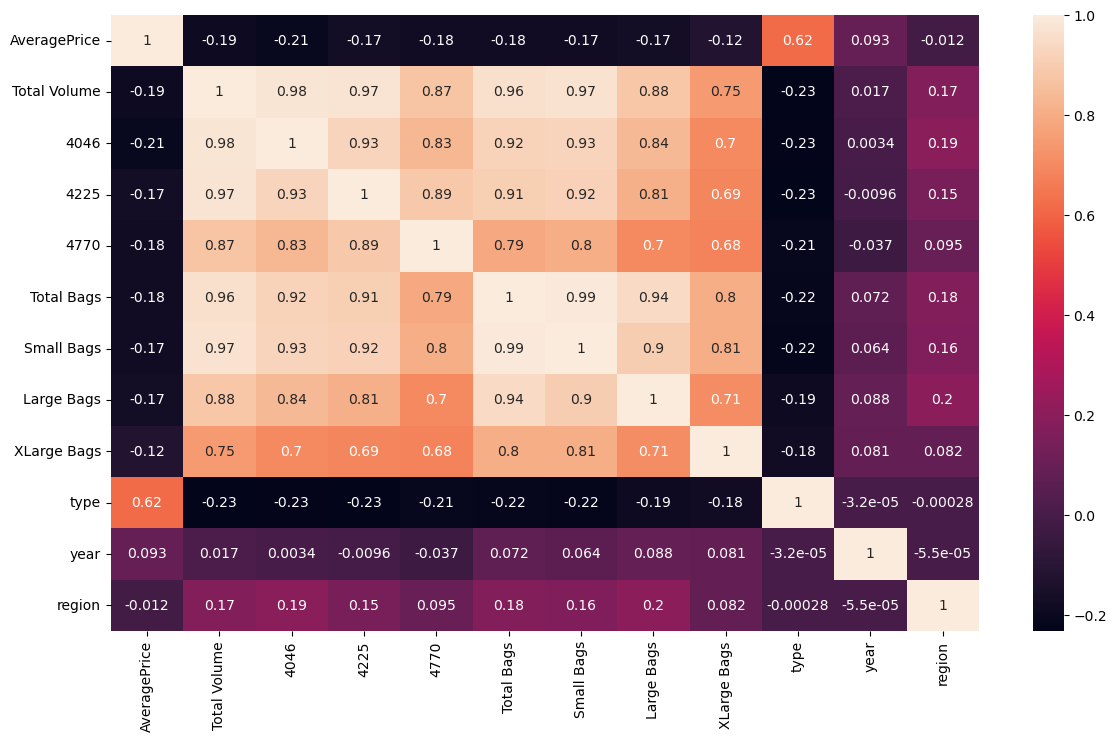

In [51]:
# visualize correlation using heatmap

plt.figure(figsize = (14, 8))
sns.heatmap(cor, annot = True, annot_kws = {'size' : 10})
plt.show()

Observation:
            1. feature v/s feature - 'Total Volume' v/s '4046' has more positive correlation 0.98
               This shows there might be multicollinearity issue but we need one more 
               proof so will plot scatter plot and check

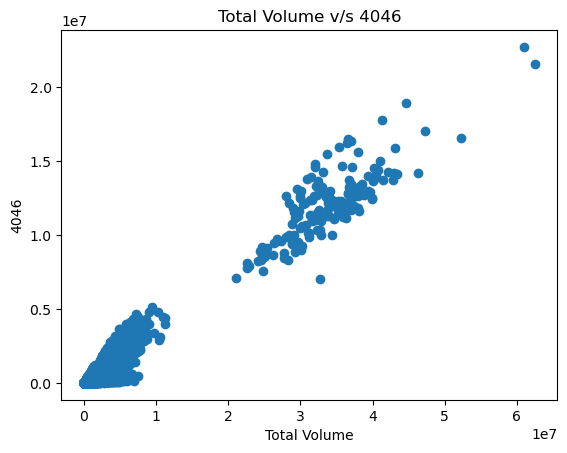

In [53]:
# one more proof so will plot scatter plot and check

plt.scatter(avocado_df['Total Volume'], avocado_df['4046'])
plt.xlabel("Total Volume")
plt.ylabel("4046")
plt.title("Total Volume v/s 4046")
plt.show()

Observation:
            1. feature v/s feature - 'Total Volume' v/s '4046' from this scatter plot, we got to
               know that there is multicollinearity issue between these two features - 
               as 'Total Volume' increases '4046' value increases - positive correlation

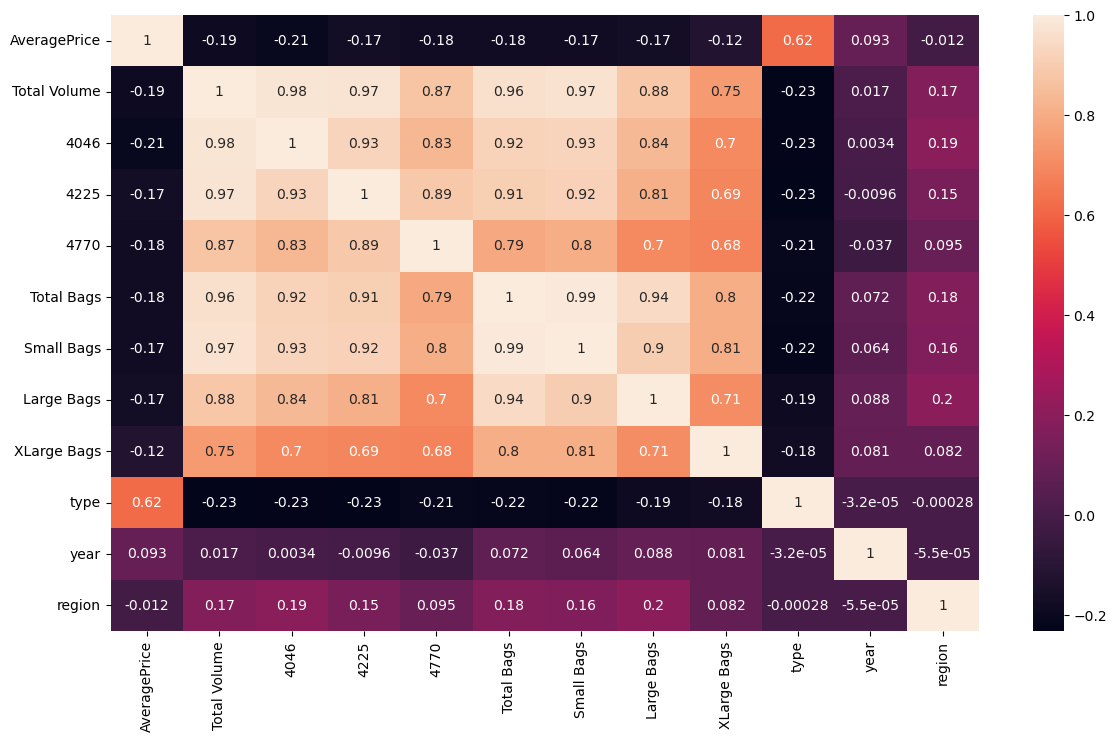

In [54]:
# visualize correlation using heatmap

plt.figure(figsize = (14, 8))
sns.heatmap(cor, annot = True, annot_kws = {'size' : 10})
plt.show()

Observation:
            1. feature v/s label - 'Total Volume' v/s 'region' is 0.17 and '4046' v/s 'region' is 0.19 
               from this heatmap we get to know '4046'. but, this number is very small. so ignore it.

Observation:
            1. feature v/s feature - 'Total Bags' v/s 'Small Bags' has more positive correlation 0.99
               This shows there might be multicollinearity issue but we need one more 
               proof so will plot scatter plot and check

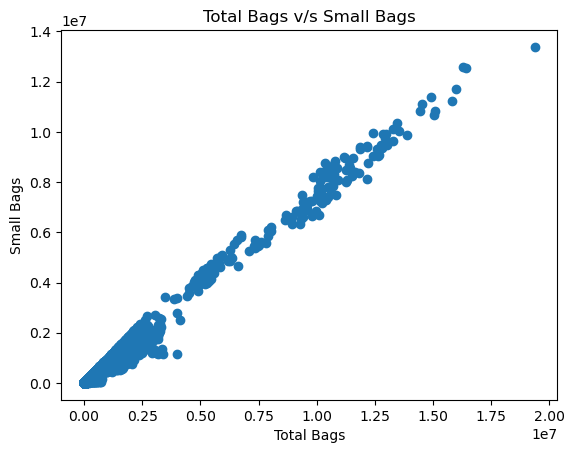

In [55]:
# one more proof so will plot scatter plot and check

plt.scatter(avocado_df['Total Bags'], avocado_df['Small Bags'])
plt.xlabel("Total Bags")
plt.ylabel("Small Bags")
plt.title("Total Bags v/s Small Bags")
plt.show()

Observation:
            1. feature v/s feature - 'Total Bags' v/s 'Small Bags' from this scatter plot, we got to
               know that there is multicollinearity issue between these two features - 
               as 'Total Bags' increases 'Small Bags' value increases - positive correlation

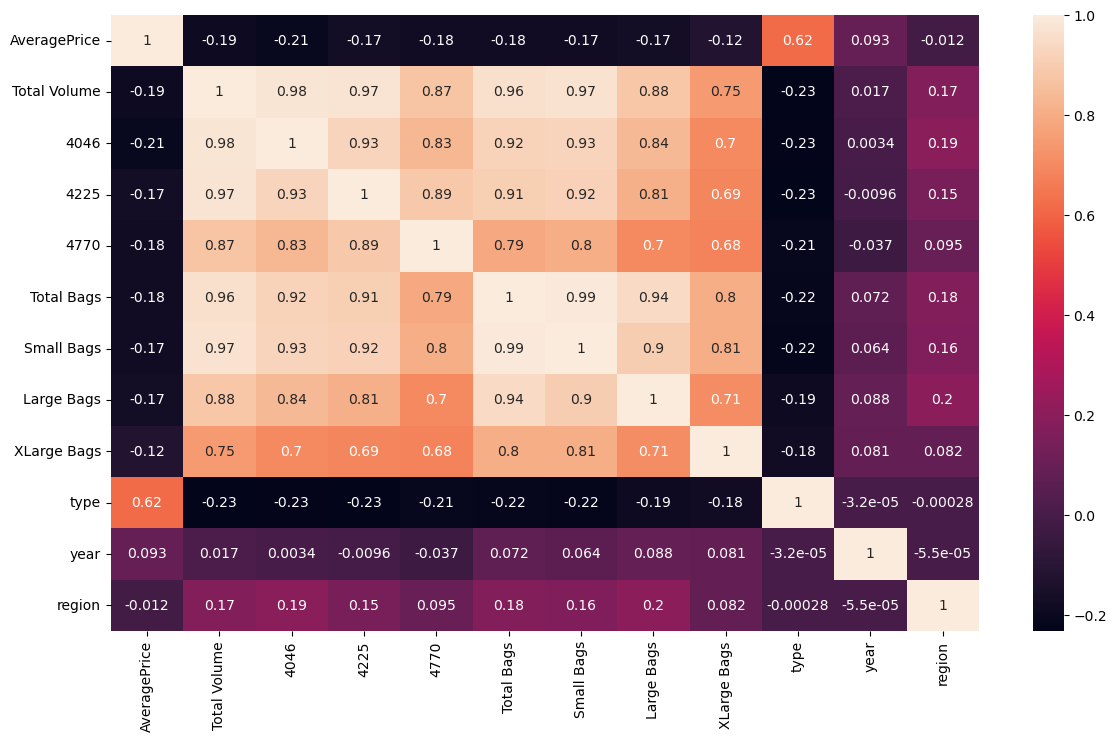

In [56]:
# visualize correlation using heatmap

plt.figure(figsize = (14, 8))
sns.heatmap(cor, annot = True, annot_kws = {'size' : 10})
plt.show()

In [ ]:
Observation:
            1. feature v/s label - 'Total Bags' v/s 'region' is 0.18 and 'Small Bags' v/s 'region' is 
                0.16 from this heatmap we get to know 'Small Bags'. but, this number is very small. 
                so ignore it.

## Checking Outliers

In [57]:
avocado_df.shape

(18249, 13)

In [58]:
# we dont check outliers for labels - so remove the label

avocado_df_features = avocado_df.drop(['Date', 'region'], axis = 1)

In [59]:
avocado_df_features.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015


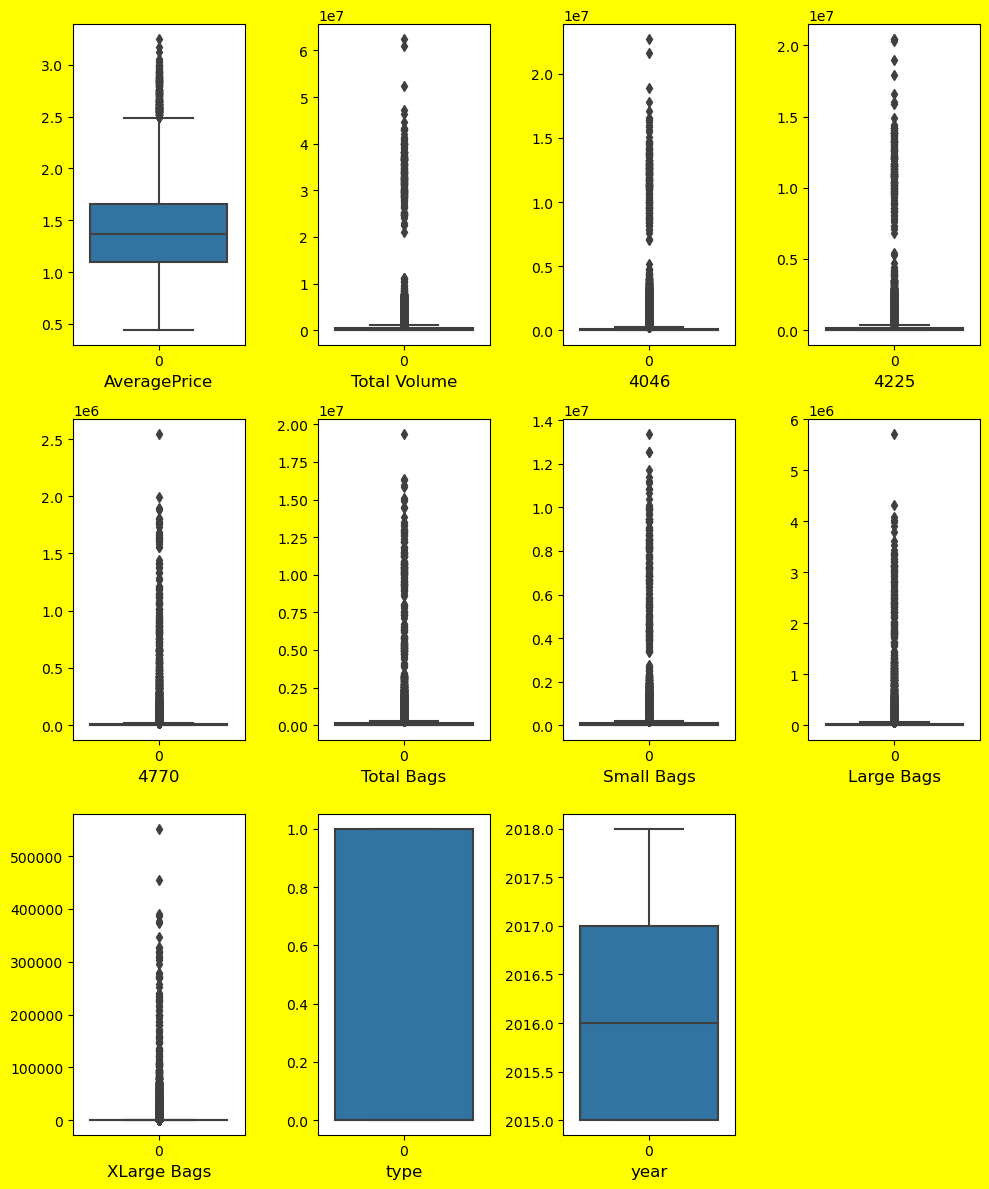

In [60]:
# Visualize the outliers using boxplot

plt.figure(figsize=(10,12), facecolor = 'yellow')
p = 1
for i in avocado_df_features:
    if p <= 11:
        ax = plt.subplot(3, 4, p)
        sns.boxplot(data = avocado_df_features[i])
        plt.xlabel(i, fontsize = 12)
    p = p + 1
plt.tight_layout()

Observations:
            1. More Outliers found in features - 'AveragePrice', 'Total Volume', '4046', '4225', 
              '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags'. Most of this outliers
               are right skewed (i.e. outliers are above max value)
            2. Remove the outliers

In [61]:
avocado_df_features.columns

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year'],
      dtype='object')

## Find IQR to identify outliers and remove it

In [62]:
# there are situation we should remove outliers and sometime to keep outliers

q1 = avocado_df.quantile(0.25)
q3 = avocado_df.quantile(0.75)
iqr = q3 - q1

In [63]:
# validating one outlier

AveragePrice_high = (q3['AveragePrice'] + (1.5 * iqr['AveragePrice']))
AveragePrice_high

# anything > 2.49 outliers

2.4999999999999996

In [64]:
# check the index which have the higher values

np_index = np.where(avocado_df['AveragePrice'] > AveragePrice_high)
np_index

# remove these indexes as they are outliers

(array([11314, 11320, 11321, 11322, 11323, 11324, 11325, 11326, 11327,
        11328, 11329, 11330, 11331, 11332, 12254, 12819, 12821, 12823,
        12824, 13033, 13035, 13037, 13038, 13395, 13657, 13661, 13813,
        14016, 14017, 14018, 14019, 14020, 14072, 14073, 14074, 14117,
        14118, 14119, 14120, 14121, 14122, 14123, 14124, 14125, 14126,
        14128, 14129, 14177, 14385, 14394, 14697, 14699, 14701, 14702,
        14806, 14807, 14808, 14809, 14810, 14811, 14812, 14911, 14912,
        14913, 14914, 14915, 14916, 14917, 14918, 14919, 15031, 15032,
        15033, 15034, 15036, 15077, 15124, 15125, 15126, 15127, 15128,
        15129, 15130, 15143, 15147, 15148, 15510, 15511, 15667, 15668,
        15669, 15671, 15672, 15673, 15674, 15675, 15676, 15680, 15684,
        15812, 15814, 15815, 15816, 15870, 15871, 16024, 16050, 16054,
        16055, 16395, 16399, 16421, 16660, 16661, 16662, 16663, 16664,
        16665, 16666, 16667, 16668, 16713, 16714, 16715, 16717, 16718,
      

In [65]:
avocado_df.shape

(18249, 13)

In [66]:
avocado_df = avocado_df.drop(avocado_df.index[np_index])

In [67]:
avocado_df.shape  # 209 rows removed - outliers

(18040, 13)

In [68]:
avocado_df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,53
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,53
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,53
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,53


In [69]:
avocado_df.reset_index(inplace = True, drop = True)

In [70]:
avocado_df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18035,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,53
18036,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,53
18037,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,53
18038,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,53


In [71]:
# validating another outlier

Total_Volume_high = (q3['Total Volume'] + (1.5 * iqr['Total Volume']))
Total_Volume_high

# anything > 1066147.855 outliers

1066147.855

In [72]:
# check the index which have the higher values

np_index1 = np.where(avocado_df['Total Volume'] > Total_Volume_high)
np_index1

# remove these indexes as they are outliers

(array([  312,   313,   314, ..., 18013, 18014, 18015], dtype=int64),)

In [73]:
avocado_df.shape

(18040, 13)

In [74]:
avocado_df = avocado_df.drop(avocado_df.index[np_index1])

In [75]:
avocado_df.shape  # 2297 rows removed - outliers

(15743, 13)

In [76]:
avocado_df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18035,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,53
18036,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,53
18037,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,53
18038,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,53


In [77]:
avocado_df.reset_index(inplace = True, drop = True)

In [78]:
avocado_df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15738,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,53
15739,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,53
15740,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,53
15741,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,53


In [79]:
# validating another outlier

high_4046 = (q3['4046'] + (1.5 * iqr['4046']))
high_4046

# anything > 276269.39 outliers

276269.39499999996

In [80]:
# check the index which have the higher values

np_index2 = np.where(avocado_df['4046'] > high_4046)
np_index2

# remove these indexes as they are outliers

(array([  52,   54,   55,   60,   66,   67,   68,   71,   72,   73,   74,
          75,   76,   77,   78,   79,   80,   81,   82,   83,   84,   85,
          86,   87,   88,   89,   90,   91,   92,   93,   94,   95,   96,
          97,   98,   99,  100,  101,  102,  103,  519,  520,  521,  522,
         523,  524,  525,  526,  527,  528,  529,  530,  531,  792,  793,
         794,  795,  796,  797,  798,  799,  800,  801,  802,  803,  804,
         805,  806,  807,  808,  809,  810,  811,  812,  813,  814,  815,
         816,  817,  818,  819,  820,  821,  822,  823, 1032, 1034, 1036,
        1037, 1040, 1043, 1044, 1046, 1048, 1052, 1055, 1057, 1059, 1061,
        1062, 1063, 1064, 1065, 1066, 1067, 1068, 1069, 1070, 1072, 1075,
        1079, 1080, 1081, 1083, 1276, 1279, 1292, 1349, 1350, 1351, 1352,
        1353, 1354, 1355, 1356, 1357, 1358, 1359, 1360, 1361, 1362, 1363,
        1364, 1365, 1366, 1367, 1368, 1369, 1370, 1371, 1679, 1701, 1703,
        1704, 1706, 1709, 1710, 1711, 

In [81]:
avocado_df.shape # 599 rows removed - outliers

(15743, 13)

In [82]:
avocado_df = avocado_df.drop(avocado_df.index[np_index2])

In [83]:
avocado_df.shape

(15144, 13)

In [84]:
avocado_df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15738,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,53
15739,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,53
15740,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,53
15741,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,53


In [85]:
avocado_df.reset_index(inplace = True, drop = True)

In [86]:
avocado_df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15139,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,53
15140,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,53
15141,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,53
15142,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,53


In [87]:
avocado_df.shape

(15144, 13)

## Checking for Skewness

In [88]:
avocado_df.skew() # not in the range -0.5 to +0.5

AveragePrice    0.321665
Total Volume    1.791511
4046            1.926121
4225            2.680089
4770            5.943811
Total Bags      3.177918
Small Bags      3.546148
Large Bags      6.242848
XLarge Bags     7.896423
type           -0.341955
year            0.237985
region          0.019976
dtype: float64

In [89]:
# removing for skewness

avocado_df['Total Volume'] = np.cbrt(avocado_df['Total Volume'])

avocado_df['4046'] = np.cbrt(avocado_df['4046'])

avocado_df['4225'] = np.cbrt(avocado_df['4225'])

avocado_df['4770'] = np.cbrt(avocado_df['4770'])

In [90]:
avocado_df.skew() # not in the range -0.5 to +0.5

AveragePrice    0.321665
Total Volume    0.492348
4046            0.735156
4225            0.797657
4770            1.676684
Total Bags      3.177918
Small Bags      3.546148
Large Bags      6.242848
XLarge Bags     7.896423
type           -0.341955
year            0.237985
region          0.019976
dtype: float64

Observation: 
            1. There are still skewness in the data

## Seperating Features and Target

In [91]:
avocado_df.shape

(15144, 13)

In [92]:
# setting Date as the DataFrame index

avocado_df.set_index('Date', inplace = True)

In [93]:
avocado_df.shape

(15144, 12)

In [94]:
x = avocado_df.drop(columns = ['region'])
y = avocado_df['region']

In [95]:
x.shape

(15144, 11)

In [96]:
y.shape

(15144,)

## One more proof to check for Multicollinearity problem - use Variance Inflation Factor (VIF)

In [97]:
# Feature Scaling using Standard Scalarization

from sklearn.preprocessing import StandardScaler

s = StandardScaler()
x_scaled = s.fit_transform(x)
x_scaled

array([[-0.34189703, -0.09791361, -0.69928249, ..., -0.24704737,
        -1.18546899, -1.20965416],
       [-0.28689686, -0.18299745, -0.77700558, ..., -0.24704737,
        -1.18546899, -1.20965416],
       [-1.44190046,  0.27721815, -0.74862542, ..., -0.24704737,
        -1.18546899, -1.20965416],
       ...,
       [ 1.1431076 , -0.76602672, -0.67159296, ..., -0.24704737,
         0.84354801,  1.99222231],
       [ 1.30810811, -0.71040598, -0.6190335 , ..., -0.24704737,
         0.84354801,  1.99222231],
       [ 0.45560545, -0.68333569, -0.46182105, ..., -0.24704737,
         0.84354801,  1.99222231]])

In [98]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['VIF Values'] = [variance_inflation_factor(x_scaled, i) for i in range(x_scaled.shape[1])]
vif['Features'] = x.columns
vif

,VIF Values,Features
0,1.736515e+00,AveragePrice
1,4.426654e+01,Total Volume
2,6.786613e+00,4046
3,1.635784e+01,4225
4,2.473348e+00,4770
5,1.809401e+12,Total Bags
6,1.094834e+12,Small Bags
7,3.639567e+11,Large Bags
8,1.291899e+09,XLarge Bags
9,3.431986e+00,type


Observation: 
            1. The threshold VIF value is 5 and any feature > 5 VIF value has high correlation with 
               other features. Here we can observe some features are > threshold value=5. 
               so there might be still multicollinearity problem.

## Modelling

In [99]:
avocado_df.shape

(15144, 12)

In [100]:
x.shape

(15144, 11)

In [101]:
y.shape

(15144,)

## Data Imbalance use Oversampling method

In [102]:
y.value_counts()

0     338
13    338
34    338
32    338
30    338
26    338
23    338
19    338
38    338
16    338
49    338
39    338
10    338
9     338
4     338
14    336
20    334
44    334
5     333
27    333
48    333
8     333
21    331
2     331
12    330
3     329
7     328
40    328
36    326
37    324
17    323
43    321
47    321
31    316
41    312
50    304
42    260
1     247
24    223
28    188
18    170
33    170
11    170
15    169
22    169
25    169
29    169
35    169
45    169
46    169
6     167
52    167
53    166
51    103
Name: region, dtype: int64

Observation:
            1. Data is imbalanced so use Oversampling method

In [103]:
from imblearn.over_sampling import SMOTE

over_samp = SMOTE(random_state = 41, k_neighbors = 3)
x1, y1 = over_samp.fit_resample(x, y)

In [104]:
y1.value_counts()

0     338
53    338
38    338
39    338
40    338
41    338
42    338
43    338
44    338
47    338
48    338
49    338
50    338
11    338
1     338
18    338
33    338
6     338
15    338
22    338
25    338
29    338
35    338
45    338
46    338
51    338
37    338
36    338
34    338
32    338
2     338
3     338
4     338
5     338
7     338
8     338
9     338
10    338
12    338
13    338
14    338
16    338
17    338
19    338
20    338
21    338
23    338
24    338
26    338
27    338
28    338
30    338
31    338
52    338
Name: region, dtype: int64

Observation:
            1. Now the data is balanced

In [105]:
x1.shape

(18252, 11)

In [106]:
y1.shape

(18252,)

In [107]:
# creating train_test_split

x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size = 0.25, random_state = 41)

In [108]:
# Function to check accuracy of different models

def metric_score(clf, x_train, x_test, y_train, y_test, train = True):
    if train == True:
        y_pred = clf.predict(x_train)
        print("Train Result ")
        print(f'Accuracy Score: {accuracy_score(y_train, y_pred) * 100 : .2f}%')
    elif train == False:
        pred = clf.predict(x_test)
        print("Test Result ")
        print(f'Accuracy Score: {accuracy_score(y_test, pred) * 100 : .2f}%')
        print("Test Classification Report \n", classification_report(y_test, pred, digits = 2))

## Decision Tree Classifier

In [109]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [110]:
# This is the training score

metric_score(dt, x_train, x_test, y_train, y_test, train = True)

Train Result 
Accuracy Score:  100.00%


In [111]:
# This is the testing score

metric_score(dt, x_train, x_test, y_train, y_test, train = False)

Test Result 
Accuracy Score:  81.17%
Test Classification Report 
               precision    recall  f1-score   support

           0       0.81      0.77      0.79        78
           1       0.82      0.84      0.83        95
           2       0.82      0.84      0.83        81
           3       0.81      0.84      0.82        81
           4       0.87      0.92      0.89        92
           5       0.73      0.68      0.71        95
           6       0.91      0.93      0.92        75
           7       0.83      0.83      0.83        82
           8       0.87      0.95      0.91        81
           9       0.81      0.83      0.82        89
          10       0.70      0.72      0.71        75
          11       0.87      0.94      0.90        90
          12       0.84      0.81      0.83        79
          13       0.72      0.69      0.71        84
          14       0.86      0.75      0.80        79
          15       0.98      0.95      0.96        83
          16   

In [112]:
# to check the confusion matrix

y_pred1 = dt.predict(x_test)
cm1 = confusion_matrix(y_test, y_pred1)
cm1

array([[60,  0,  0, ...,  0,  0,  0],
       [ 0, 80,  0, ...,  0,  0,  1],
       [ 0,  0, 68, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ..., 95,  0,  0],
       [ 0,  0,  0, ...,  0, 97,  0],
       [ 0,  2,  3, ...,  0,  0, 65]], dtype=int64)

## Random Tree Classifier

In [113]:
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier

In [114]:
random_clf = RandomForestClassifier()
random_clf.fit(x_train, y_train)

RandomForestClassifier()

In [115]:
# This is the training score

metric_score(random_clf, x_train, x_test, y_train, y_test, train = True)

Train Result 
Accuracy Score:  100.00%


In [116]:
# This is the testing score

metric_score(random_clf, x_train, x_test, y_train, y_test, train = False)

Test Result 
Accuracy Score:  91.34%
Test Classification Report 
               precision    recall  f1-score   support

           0       0.85      0.94      0.89        78
           1       0.89      0.93      0.91        95
           2       0.89      0.95      0.92        81
           3       0.88      0.84      0.86        81
           4       0.90      0.99      0.94        92
           5       0.94      0.79      0.86        95
           6       0.95      1.00      0.97        75
           7       0.94      0.88      0.91        82
           8       0.95      0.98      0.96        81
           9       0.87      0.90      0.88        89
          10       0.88      0.93      0.90        75
          11       0.97      0.97      0.97        90
          12       0.95      0.92      0.94        79
          13       0.88      0.79      0.83        84
          14       0.95      0.94      0.94        79
          15       0.99      0.99      0.99        83
          16   

In [117]:
# to check the confusion matrix

y_pred2 = random_clf.predict(x_test)
cm2 = confusion_matrix(y_test, y_pred2)
cm2

array([[73,  0,  0, ...,  0,  0,  0],
       [ 0, 88,  0, ...,  0,  0,  0],
       [ 0,  0, 77, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ..., 95,  0,  0],
       [ 0,  0,  0, ...,  0, 99,  0],
       [ 0,  1,  2, ...,  0,  0, 79]], dtype=int64)

## Extra Tree Classifier

In [118]:
from sklearn.ensemble import ExtraTreesClassifier

ETC = ExtraTreesClassifier()
ETC.fit(x_train, y_train) 

ExtraTreesClassifier()

In [119]:
# This is the training score

metric_score(ETC, x_train, x_test, y_train, y_test, train = True)

Train Result 
Accuracy Score:  100.00%


In [120]:
# This is the testing score

metric_score(ETC, x_train, x_test, y_train, y_test, train = False)

Test Result 
Accuracy Score:  92.37%
Test Classification Report 
               precision    recall  f1-score   support

           0       0.83      0.92      0.87        78
           1       0.96      0.95      0.95        95
           2       0.95      0.99      0.97        81
           3       0.87      0.85      0.86        81
           4       0.94      0.99      0.96        92
           5       0.95      0.83      0.89        95
           6       0.99      1.00      0.99        75
           7       0.97      0.89      0.93        82
           8       0.96      0.98      0.97        81
           9       0.90      0.92      0.91        89
          10       0.84      0.89      0.86        75
          11       0.98      0.98      0.98        90
          12       0.95      0.92      0.94        79
          13       0.89      0.80      0.84        84
          14       0.96      0.96      0.96        79
          15       1.00      1.00      1.00        83
          16   

In [121]:
# to check the confusion matrix

y_pred3 = ETC.predict(x_test)
cm3 = confusion_matrix(y_test, y_pred3)
cm3

array([[72,  0,  0, ...,  0,  0,  0],
       [ 0, 90,  0, ...,  0,  0,  0],
       [ 0,  0, 80, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ..., 95,  0,  0],
       [ 0,  0,  0, ...,  0, 99,  0],
       [ 0,  0,  0, ...,  0,  0, 82]], dtype=int64)

## KNN Classifier

In [125]:
s = StandardScaler()
x_scaled_1 = s.fit_transform(x1)
x_scaled_1

array([[-0.39973675, -0.12075321, -0.74688235, ..., -0.2297739 ,
        -1.33503448, -1.19324048],
       [-0.3436833 , -0.20714618, -0.82668725, ..., -0.2297739 ,
        -1.33503448, -1.19324048],
       [-1.52080592,  0.26015044, -0.79754692, ..., -0.2297739 ,
        -1.33503448, -1.19324048],
       ...,
       [ 0.83634987, -0.71588618, -0.43040748, ..., -0.2297739 ,
         0.74904432, -0.11512429],
       [ 0.51129425, -0.86787792, -0.69092195, ..., -0.2297739 ,
         0.74904432, -0.11512429],
       [ 0.50546561, -0.92997874, -0.57327604, ..., -0.2297739 ,
         0.74904432, -1.19324048]])

In [126]:
# creating train_test_split

x_train1, x_test1, y_train1, y_test1 = train_test_split(x_scaled_1, y1, test_size = 0.25, random_state = 41)

In [127]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train1, y_train1)

KNeighborsClassifier()

In [128]:
# This is the training score

metric_score(knn, x_train1, x_test1, y_train1, y_test1, train = True)

Train Result 
Accuracy Score:  89.61%


In [129]:
# This is the testing score

metric_score(knn, x_train1, x_test1, y_train1, y_test1, train = False)

Test Result 
Accuracy Score:  82.34%
Test Classification Report 
               precision    recall  f1-score   support

           0       0.64      0.91      0.75        78
           1       0.63      0.77      0.69        95
           2       0.88      0.93      0.90        81
           3       0.73      0.72      0.73        81
           4       0.85      0.96      0.90        92
           5       0.90      0.82      0.86        95
           6       0.94      1.00      0.97        75
           7       0.83      0.87      0.85        82
           8       0.94      0.94      0.94        81
           9       0.71      0.76      0.74        89
          10       0.65      0.71      0.68        75
          11       0.91      0.96      0.93        90
          12       0.92      0.85      0.88        79
          13       0.66      0.63      0.65        84
          14       0.78      0.82      0.80        79
          15       0.97      1.00      0.98        83
          16   

In [130]:
# to check the confusion matrix

y_pred4 = knn.predict(x_test1)
cm4 = confusion_matrix(y_test1, y_pred4)
cm4

array([[71,  0,  0, ...,  0,  0,  0],
       [ 0, 73,  0, ...,  0,  0,  0],
       [ 0,  0, 75, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ..., 95,  0,  0],
       [ 0,  0,  0, ...,  0, 97,  0],
       [ 0,  1,  2, ...,  0,  0, 61]], dtype=int64)

## Cross Validation Score

In [131]:
cross_val_score(random_clf, x1, y1, cv = 5)

array([0.74993153, 0.85291701, 0.77561644, 0.72328767, 0.6139726 ])

In [132]:
cross_val_score(random_clf, x1, y1, cv = 5).mean()

0.7436385002420053

In [133]:
cross_val_score(ETC, x1, y1, cv = 5)

array([0.7973158 , 0.85976445, 0.78219178, 0.70520548, 0.57863014])

In [134]:
cross_val_score(ETC, x1, y1, cv = 5).mean() # no overfitting problem in ETC model

0.7426492873035349

In [136]:
cross_val_score(knn, x_scaled_1, y1, cv = 5)

array([0.69405642, 0.72007669, 0.63808219, 0.45369863, 0.3830137 ])

In [137]:
cross_val_score(knn, x_scaled_1, y1, cv = 5).mean()  # no overfitting problem

0.5777855269526457

## HyperParameter Tuning for ETC model as its accuracy is better 92.37%

In [138]:
from sklearn.model_selection import GridSearchCV

parameters = {'criterion': ['gini', 'entropy'], 'random_state': [50, 100, 1000], 'max_depth': [0, 10, 20],
             'n_jobs': [-2, -1, 1], 'n_estimators': [50, 100, 200, 300]}

In [139]:
GCD = GridSearchCV(ETC, parameters, cv = 5)

In [140]:
GCD.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 10, 20],
                         'n_estimators': [50, 100, 200, 300],
                         'n_jobs': [-2, -1, 1],
                         'random_state': [50, 100, 1000]})

In [141]:
GCD.best_params_

{'criterion': 'entropy',
 'max_depth': 20,
 'n_estimators': 200,
 'n_jobs': -2,
 'random_state': 100}

In [142]:
ETC_final_model = ExtraTreesClassifier(criterion = 'entropy', max_depth = 20, n_jobs = -2, n_estimators = 200, random_state = 100)

In [143]:
ETC_final_model.fit(x_train, y_train)

ExtraTreesClassifier(criterion='entropy', max_depth=20, n_estimators=200,
                     n_jobs=-2, random_state=100)

In [144]:
ETC_pred = ETC_final_model.predict(x_test)
ETC_acc = accuracy_score(y_test, ETC_pred)

In [145]:
ETC_acc

0.9222003068156914

Observation:
            1. ETC with hypertuning - testing acc -   92.22%
            2. ETC without hypertuning - testing acc - 92.37%
            3. We will choose ETC without hypertuning model for prediction

## Save the Model

In [146]:
# use Extra Tree Classifier and the save the model

import pickle
pickle.dump(ETC, open('Avocado_Classification_Region_Model.pkl', 'wb'))

## prediction using the saved model

In [147]:
loaded_model = pickle.load(open('Avocado_Classification_Region_Model.pkl', 'rb'))
prediction_saved_model = loaded_model.predict(x_test)
prediction_saved_model

array([22,  9, 47, ..., 51,  9, 22])

In [148]:
print(y_test)

16066    22
6775      9
11533    47
12970    22
2803     21
         ..
8311     38
16785    33
17782    51
6801      9
16032    22
Name: region, Length: 4563, dtype: int32


In [149]:
# comparing the predicted and actual values

a = np.array(y_test)
df1 = pd.DataFrame()
df1['Predicted'] = prediction_saved_model
df1['Original'] = a
df1

,Predicted,Original
0,22,22
1,9,9
2,47,47
3,22,22
4,21,21
...,...,...
4558,38,38
4559,33,33
4560,51,51
4561,9,9


Observation:
            1. Almost all actual and predicted values match
            2. This Avocado_Classification_Region_Model.pkl can be used to find the region

Observation:
            1. Decision Tree Classifier - testing accuracy                    - 81.17% 
            2. Random Forest Classifier - testing accuracy                    - 91.34%
            3. Extra Tree Classifier without hypertuning - testing accuracy   - 92.37%
            4. Extra Tree Classifier with hypertuning - testing acc           - 92.22%
            4. KNN Classifier - testing accuracy                              - 82.34%
            5. Comparing all the Classifiers - Extra Tree Classifier without hypertuning has the
               good accuracy and our model is also free from overfitting/underfitting problem

## Avocado Project - Regression to find the average price

## Seperating Features and Target

In [150]:
avocado_df.shape

(15144, 12)

In [151]:
avocado_df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Date,,,,,,,,,,,,
2015-12-27,1.33,40.049235,10.120997,37.903460,3.638275,8696.87,8603.62,93.25,0.0,0,2015,0
2015-12-20,1.35,38.001150,8.768933,35.473513,3.878204,9505.56,9408.07,97.49,0.0,0,2015,0
2015-12-13,0.93,49.079175,9.262632,47.790416,5.072283,8145.35,8042.21,103.14,0.0,0,2015,0
2015-12-06,1.08,42.906983,10.421946,41.597133,4.171309,5811.16,5677.40,133.76,0.0,0,2015,0
2015-11-29,1.28,37.093893,9.800999,35.260208,4.231732,6183.95,5986.26,197.69,0.0,0,2015,0


Observation:
            1. Predict Average Price of a Avocado is a continous data so this is a Regression problem.

In [152]:
x2 = avocado_df.drop(columns = ['AveragePrice'])
y2 = avocado_df['AveragePrice']

In [153]:
x2.shape

(15144, 11)

In [154]:
y2.shape

(15144,)

In [156]:
s = StandardScaler()
x_scaled_1 = s.fit_transform(x2)
x_scaled_1

array([[-0.09791361, -0.69928249,  0.45357964, ..., -1.18546899,
        -1.20965416, -1.65738628],
       [-0.18299745, -0.77700558,  0.33229765, ..., -1.18546899,
        -1.20965416, -1.65738628],
       [ 0.27721815, -0.74862542,  0.94705125, ..., -1.18546899,
        -1.20965416, -1.65738628],
       ...,
       [-0.76602672, -0.67159296, -0.76512385, ...,  0.84354801,
         1.99222231,  1.77484551],
       [-0.71040598, -0.6190335 , -0.71990737, ...,  0.84354801,
         1.99222231,  1.77484551],
       [-0.68333569, -0.46182105, -0.77408463, ...,  0.84354801,
         1.99222231,  1.77484551]])

In [157]:
# creating train_test_split

x_train1, x_test1, y_train1, y_test1 = train_test_split(x_scaled_1, y2, test_size = 0.25, random_state = 41)

## Modelling

## Linear Regression

In [158]:
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.linear_model import LinearRegression

In [159]:
model_LR = LinearRegression()
model_LR.fit(x_train1 , y_train1)

LinearRegression()

## Lets check how well model fits on train data

In [160]:
model_LR.score(x_train1, y_train1)

0.42056987099978904

## Lets check how well model fits on test data

In [161]:
model_LR.score(x_test1, y_test1)

0.43448866003035513

In [162]:
y_pred_LR = model_LR.predict(x_test1)
y_pred_LR

array([1.85791053, 1.7043484 , 1.6181673 , ..., 1.54813689, 1.40802201,
       1.65318114])

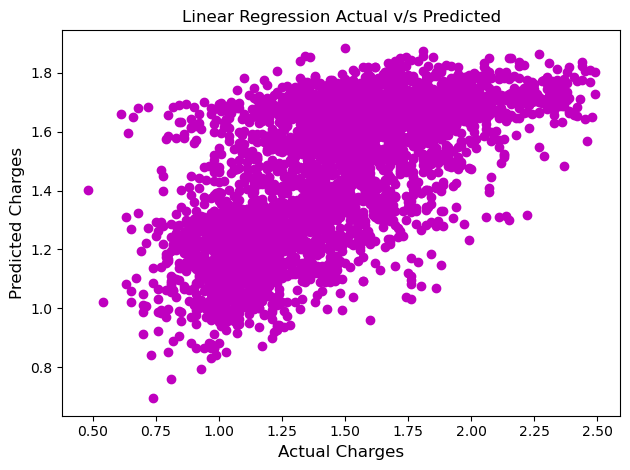

In [163]:
plt.scatter(y_test1, y_pred_LR, color = 'm')
plt.xlabel("Actual Charges", fontsize = 12)
plt.ylabel('Predicted Charges', fontsize = 12)
plt.title("Linear Regression Actual v/s Predicted")
plt.tight_layout()

Observation:
            1. we are able to see some number of samples are following linear curve

In [164]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [165]:
print("r2_score on test data ", r2_score(y_test1, y_pred_LR) * 100)

print("MAE ", mean_absolute_error(y_test1, y_pred_LR))

print("MSE ", mean_squared_error(y_test1, y_pred_LR))

print("RMSE ", np.sqrt(mean_squared_error(y_test1, y_pred_LR)))

r2_score on test data  43.44886600303551
MAE  0.21362055608301872
MSE  0.07378488407840104
RMSE  0.2716337314812007


## Random Forest Regression

In [166]:
# creating train_test_split

x_train2, x_test2, y_train2, y_test2 = train_test_split(x2, y2, test_size = 0.25, random_state = 41)

In [167]:
from sklearn.ensemble import RandomForestRegressor

RFR = RandomForestRegressor()
RFR.fit(x_train2, y_train2)

RandomForestRegressor()

In [168]:
pred_RFR = RFR.predict(x_test2)
pred_RFR

array([1.8575, 1.3459, 1.5161, ..., 1.4093, 1.6025, 1.3771])

In [169]:
## Lets check how well model fits on train data

RFR.score(x_train2, y_train2)

0.973745585590627

In [170]:
## Lets check how well model fits on test data

RFR.score(x_test2, y_test2)

0.8082910241215572

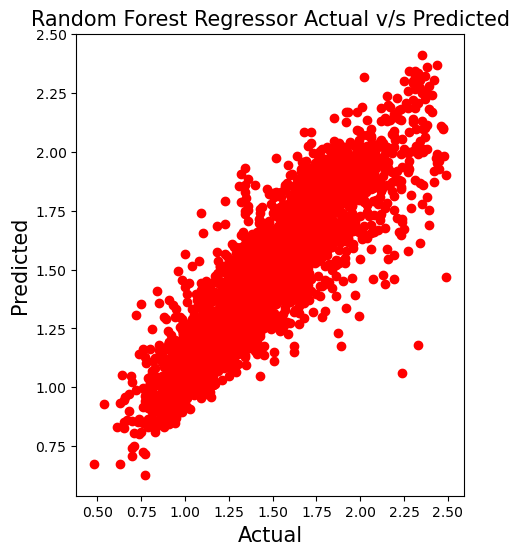

In [171]:
# Visualization of Actual v/s Predicted

# to check the relation between actual and predicted

plt.figure(figsize=(5, 6))
plt.scatter(x = y_test2, y = pred_RFR, color = 'r')
plt.xlabel('Actual', fontsize=15)
plt.ylabel('Predicted', fontsize=15)
plt.title('Random Forest Regressor Actual v/s Predicted', fontsize=15)
plt.show()

Observation:
            1. we are able to see more number of samples are following linear curve

In [172]:
print("r2_score on test data ", r2_score(y_test2, pred_RFR) * 100)

print("MAE ", mean_absolute_error(y_test2, pred_RFR))

print("MSE ", mean_squared_error(y_test2, pred_RFR))

print("RMSE ", np.sqrt(mean_squared_error(y_test2, pred_RFR)))

r2_score on test data  80.82910241215572
MAE  0.11305890121500266
MSE  0.025013158114104598
RMSE  0.15815548714510225


## Ridge Regression

In [173]:
from sklearn.linear_model import Ridge

In [174]:
ridge = Ridge()
ridge.fit(x_train1, y_train1)

Ridge()

In [175]:
pred_ridge = ridge.predict(x_test1)
pred_ridge

array([1.85704709, 1.70444067, 1.6180419 , ..., 1.5486706 , 1.40903982,
       1.65325135])

In [176]:
## Lets check how well model fits on train data

ridge.score(x_train1, y_train1)

0.42056642733899063

In [177]:
## Lets check how well model fits on test data

ridge.score(x_test1, y_test1)

0.43450137523237786

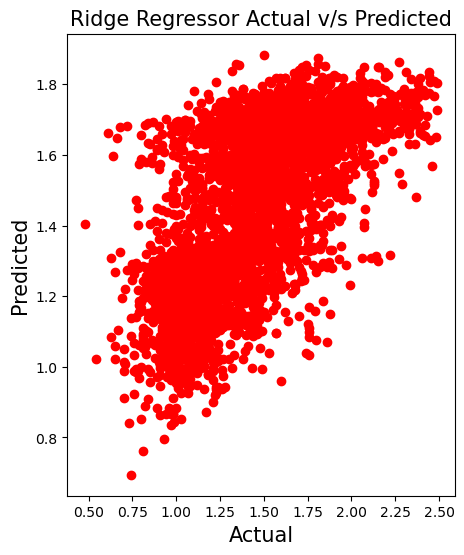

In [178]:
# Visualization of Actual v/s Predicted

# to check the relation between actual and predicted

plt.figure(figsize=(5, 6))
plt.scatter(x = y_test1, y = pred_ridge, color = 'r')
plt.xlabel('Actual', fontsize=15)
plt.ylabel('Predicted', fontsize=15)
plt.title('Ridge Regressor Actual v/s Predicted', fontsize=15)
plt.show()

Observation:
            1. we are able to see some number of samples are following linear curve

In [179]:
print("r2_score on test data ", r2_score(y_test1, pred_ridge) * 100)

print("MAE ", mean_absolute_error(y_test1, pred_ridge))

print("MSE ", mean_squared_error(y_test1, pred_ridge))

print("RMSE ", np.sqrt(mean_squared_error(y_test1, pred_ridge)))

r2_score on test data  43.450137523237785
MAE  0.21359984024878975
MSE  0.07378322506709398
RMSE  0.2716306776987717


## XGBoost Regressor

In [180]:
!pip install xgboost

In [181]:
import xgboost as xgb

xg = xgb.XGBRegressor()

In [182]:
xg.fit(x_train2, y_train2)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [183]:
pred_xg = xg.predict(x_test2)
pred_xg

array([2.0876827, 1.2165585, 1.5569134, ..., 1.3878392, 1.6020546,
       1.2316787], dtype=float32)

In [184]:
## Lets check how well model fits on train data

xg.score(x_train2, y_train2)

0.926060606761558

In [185]:
## Lets check how well model fits on test data

xg.score(x_test2, y_test2)

0.8087806993749881

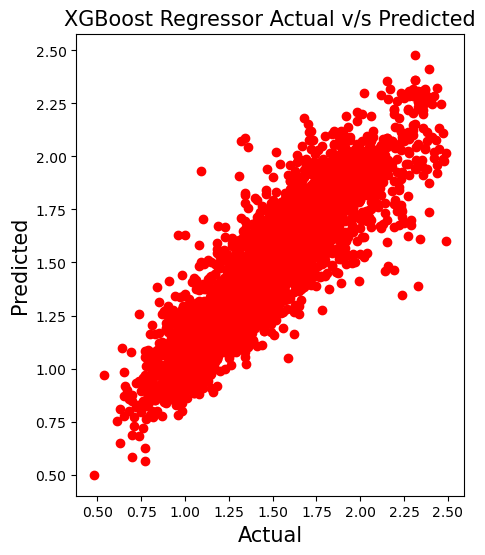

In [186]:
# Visualization of Actual v/s Predicted

# to check the relation between actual and predicted

plt.figure(figsize=(5, 6))
plt.scatter(x = y_test2, y = pred_xg, color = 'r')
plt.xlabel('Actual', fontsize=15)
plt.ylabel('Predicted', fontsize=15)
plt.title('XGBoost Regressor Actual v/s Predicted', fontsize=15)
plt.show()

Observation:
            1. we are able to see most number of samples are following linear curve

In [187]:
print("r2_score on test data ", r2_score(y_test2, pred_xg) * 100)

print("MAE ", mean_absolute_error(y_test2, pred_xg))

print("MSE ", mean_squared_error(y_test2, pred_xg))

print("RMSE ", np.sqrt(mean_squared_error(y_test2, pred_xg)))

r2_score on test data  80.87806993749881
MAE  0.11634275741509137
MSE  0.024949267915523602
RMSE  0.15795337259939593


Observation:
            1. We can choose XGBoost Regressor Regressor model for prediction, it has higher acc is 
               80.87% or Random Forest Regressor model - testing accuracy - 80.82%

## Saving the model

In [188]:
import pickle
filename = "Avocado_Regression_AveragePrice_Model.pkl"
pickle.dump(xg, open(filename, 'wb'))

## Predict the saved model

In [189]:
# lets load the saved model and get the prediction

loaded_model1 = pickle.load(open('Avocado_Regression_AveragePrice_Model.pkl', 'rb'))

result1 = loaded_model1.score(x_test1, y_test1)
print(result1)

-0.5932174895418356


In [190]:
compare = pd.DataFrame([loaded_model1.predict(x_test1)[:], y_test1[:]], index=['Predicted', 'Original'])
compare

,0,1,2,3,4,5,6,7,8,9,...,3776,3777,3778,3779,3780,3781,3782,3783,3784,3785
Predicted,1.742965,1.741068,1.741068,1.741068,1.741068,1.691155,1.741068,1.741068,1.741068,1.711855,...,1.626029,1.741068,1.581137,1.741068,1.741068,1.741068,1.691994,1.742965,1.741068,1.741068
Original,1.340000,1.330000,1.560000,1.150000,1.660000,1.080000,1.590000,1.630000,1.860000,1.200000,...,1.180000,2.110000,1.010000,1.340000,1.800000,1.820000,1.430000,1.350000,1.620000,1.100000


In [ ]:
Observation:
            1. Actual and predicted values almost matches
            2. This Avocado_Regression_AveragePrice_Model.pkl can be used to predict the average price

In [ ]:
Observation:
            1. Linear Regression model - testing accuracy - 43.44%
            2. Random Forest Regressor model - testing accuracy - 80.82%
            3. Ridge Regression model - testing accuracy - 43.45%
            4. XGBoost Regressor Model - testing accuracy - 80.87%
            5. Comparing both the models - XGBoost Regressor model has the higher accuracy 80.87% and also 
               there is no overfitting of the model